TS2000 데이터 csv파일 다운 시 데이터 정리 포맷 7번

In [52]:

!pip install yfinance
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
import warnings
import os
import yfinance as yf
from scipy.stats import ttest_ind

In [53]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
filename =  '/content/drive/My Drive/Last_Final_Ubion/Coding/CSVfiles/Kospi_all_Z_F_Score_03(2018,2019).csv'


In [55]:
data = pd.read_csv(filename, encoding='cp949')

data

,구분,년도,2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,2018.10,2018.11,2018.12,2018.13,2018.14,2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,2019.8,2019.9,2019.10,2019.11,2019.12,2019.13,2019.14
0,NaN,항목,자산(*)(IFRS)(천원),유동자산(*)(IFRS)(천원),유동부채(*)(IFRS)(천원),이익잉여금(결손금)(*)(IFRS)(천원),매출액(수익)(*)(IFRS)(천원),매출원가(*)(IFRS)(천원),판매비와 관리비(물류원가 등 포함)(*)(IFRS)(천원),자본(*)(IFRS)(천원),부채(*)(IFRS)(천원),당기순이익(손실)(IFRS)(천원),영업활동으로 인한 현금흐름(간접법)(*)(IFRS)(천원),부채비율(IFRS),유동비율(IFRS),* 발행한 주식총수(*)(IFRS)(천원),종가(원),자산(*)(IFRS)(천원),유동자산(*)(IFRS)(천원),유동부채(*)(IFRS)(천원),이익잉여금(결손금)(*)(IFRS)(천원),매출액(수익)(*)(IFRS)(천원),매출원가(*)(IFRS)(천원),판매비와 관리비(물류원가 등 포함)(*)(IFRS)(천원),자본(*)(IFRS)(천원),부채(*)(IFRS)(천원),당기순이익(손실)(IFRS)(천원),영업활동으로 인한 현금흐름(간접법)(*)(IFRS)(천원),부채비율(IFRS),유동비율(IFRS),* 발행한 주식총수(*)(IFRS)(천원),종가(원)
1,회사명,거래소코드,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount
2,(주)BNK금융지주,138930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7660
3,(주)DB하이텍,000990,1050696487,380098326,156793407,269771133,669279136,453942755,102452079,542557222,508139265,95087399,182780278,93.66,242.42,44511167,10850,1089400761,422531166,219572033,374009785,807416423,513292637,112967914,645305205,444095557,121159865,160796839,68.82,192.43,44511167,27600
4,(주)JB금융지주,175330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,효성티앤씨(주),298020,1349985212,479176408,810488702,29649284,2046592749,1917697666,78170294,456251526,893733686,31881471,48104786,NaN,NaN,4327682,185000,1390922091,469504570,768196765,22450770,3739477556,3470064705,139090331,444655983,946266109,1962311,137735202,212.81,61.12,4327682,154500
796,효성화학(주),298000,1599749937,311199792,639308544,20266923,1116772144,1003310624,49608113,362072050,1237677886,22277083,79604447,NaN,NaN,3190126,142000,1555801948,286608578,415372134,104491701,1813137242,1569551816,85408599,446296829,1109505119,92166809,253989827,248.6,69,3190126,144500
797,휴켐스(주),069260,843448208,480574297,99777710,449154386,762875404,586525868,36271485,646500977,196947231,93521536,116463008,30.46,481.64,40878588,24100,893230019,394302988,168017509,471581809,659772632,516768586,36386332,651787945,241442074,70477104,108186290,37.04,234.68,40878588,21150
798,흥국화재해상보험(주),000540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3065


In [56]:
data1 = data.rename(columns = 
    {"구분" : "회사명",
    "년도" : "거래소코드",
    "2018" : "자산(2018)", 
	"2018.1" : "유동자산(2018)",
    "2018.2" : "유동부채(2018)",
    "2018.3" : "이익잉여금(결손금)(2018)",
    "2018.4" : "매출액(수익)(2018)",	
    "2018.5" : "매출원가(2018)",
    "2018.6" : "판매비와 관리비(물류원가 등 포함)(2018)",
    "2018.7" : "자본(2018)",
    "2018.8" : "부채(2018)",
    "2018.9" : "당기순이익(2018)",
    "2018.10" : "영업활동으로 인한 현금흐름(간접법)(2018)",
    "2018.11" : "부채비율(2018)",
    "2018.12" : "유동비율(2018)",
    "2018.13" : "발행한 주식총수(2018)",
    "2018.14" : "종가(원)(2018)", 
    "2019" :  "자산(2019)",	
    "2019.1" : "유동자산(2019)",
    "2019.2" :	"유동부채(2019)",
    "2019.3" :	"이익잉여금(결손금)(2019)",
    "2019.4" : "매출액(수익)(2019)",	
    "2019.5" : "매출원가(2019)",
    "2019.6" :	"판매비와 관리비(물류원가 등 포함)(2019)",
    "2019.7" : "자본(2019)",
    "2019.8" : "부채(2019)",
    "2019.9" : "당기순이익(2019)",
    "2019.10" : "영업활동으로 인한 현금흐름(간접법)(2019)",
    "2019.11" : "부채비율(2019)",
    "2019.12" : "유동비율(2019)",
    "2019.13" : "발행한 주식총수(2019)",
    "2019.14" : "종가(원)(2019)"},
    )
#inplace = True

In [57]:
data1

,회사명,거래소코드,자산(2018),유동자산(2018),유동부채(2018),이익잉여금(결손금)(2018),매출액(수익)(2018),매출원가(2018),판매비와 관리비(물류원가 등 포함)(2018),자본(2018),부채(2018),당기순이익(2018),영업활동으로 인한 현금흐름(간접법)(2018),부채비율(2018),유동비율(2018),발행한 주식총수(2018),종가(원)(2018),자산(2019),유동자산(2019),유동부채(2019),이익잉여금(결손금)(2019),매출액(수익)(2019),매출원가(2019),판매비와 관리비(물류원가 등 포함)(2019),자본(2019),부채(2019),당기순이익(2019),영업활동으로 인한 현금흐름(간접법)(2019),부채비율(2019),유동비율(2019),발행한 주식총수(2019),종가(원)(2019)
0,NaN,항목,자산(*)(IFRS)(천원),유동자산(*)(IFRS)(천원),유동부채(*)(IFRS)(천원),이익잉여금(결손금)(*)(IFRS)(천원),매출액(수익)(*)(IFRS)(천원),매출원가(*)(IFRS)(천원),판매비와 관리비(물류원가 등 포함)(*)(IFRS)(천원),자본(*)(IFRS)(천원),부채(*)(IFRS)(천원),당기순이익(손실)(IFRS)(천원),영업활동으로 인한 현금흐름(간접법)(*)(IFRS)(천원),부채비율(IFRS),유동비율(IFRS),* 발행한 주식총수(*)(IFRS)(천원),종가(원),자산(*)(IFRS)(천원),유동자산(*)(IFRS)(천원),유동부채(*)(IFRS)(천원),이익잉여금(결손금)(*)(IFRS)(천원),매출액(수익)(*)(IFRS)(천원),매출원가(*)(IFRS)(천원),판매비와 관리비(물류원가 등 포함)(*)(IFRS)(천원),자본(*)(IFRS)(천원),부채(*)(IFRS)(천원),당기순이익(손실)(IFRS)(천원),영업활동으로 인한 현금흐름(간접법)(*)(IFRS)(천원),부채비율(IFRS),유동비율(IFRS),* 발행한 주식총수(*)(IFRS)(천원),종가(원)
1,회사명,거래소코드,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount
2,(주)BNK금융지주,138930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7660
3,(주)DB하이텍,000990,1050696487,380098326,156793407,269771133,669279136,453942755,102452079,542557222,508139265,95087399,182780278,93.66,242.42,44511167,10850,1089400761,422531166,219572033,374009785,807416423,513292637,112967914,645305205,444095557,121159865,160796839,68.82,192.43,44511167,27600
4,(주)JB금융지주,175330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,효성티앤씨(주),298020,1349985212,479176408,810488702,29649284,2046592749,1917697666,78170294,456251526,893733686,31881471,48104786,NaN,NaN,4327682,185000,1390922091,469504570,768196765,22450770,3739477556,3470064705,139090331,444655983,946266109,1962311,137735202,212.81,61.12,4327682,154500
796,효성화학(주),298000,1599749937,311199792,639308544,20266923,1116772144,1003310624,49608113,362072050,1237677886,22277083,79604447,NaN,NaN,3190126,142000,1555801948,286608578,415372134,104491701,1813137242,1569551816,85408599,446296829,1109505119,92166809,253989827,248.6,69,3190126,144500
797,휴켐스(주),069260,843448208,480574297,99777710,449154386,762875404,586525868,36271485,646500977,196947231,93521536,116463008,30.46,481.64,40878588,24100,893230019,394302988,168017509,471581809,659772632,516768586,36386332,651787945,241442074,70477104,108186290,37.04,234.68,40878588,21150
798,흥국화재해상보험(주),000540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3065


In [58]:
data1.describe()

,회사명,거래소코드,자산(2018),유동자산(2018),유동부채(2018),이익잉여금(결손금)(2018),매출액(수익)(2018),매출원가(2018),판매비와 관리비(물류원가 등 포함)(2018),자본(2018),부채(2018),당기순이익(2018),영업활동으로 인한 현금흐름(간접법)(2018),부채비율(2018),유동비율(2018),발행한 주식총수(2018),종가(원)(2018),자산(2019),유동자산(2019),유동부채(2019),이익잉여금(결손금)(2019),매출액(수익)(2019),매출원가(2019),판매비와 관리비(물류원가 등 포함)(2019),자본(2019),부채(2019),당기순이익(2019),영업활동으로 인한 현금흐름(간접법)(2019),부채비율(2019),유동비율(2019),발행한 주식총수(2019),종가(원)(2019)
count,799,800,720,720,720,720,720,720,720,720,720,720,720,711,711,720,743,740,740,740,740,740,740,740,740,740,740,740,736,736,740,770
unique,799,800,720,720,720,720,720,650,720,720,720,720,720,706,702,681,636,740,740,740,740,740,667,740,740,740,740,740,725,727,698,692
top,(주)빙그레,001780,831852513,9702912,2221443271,603054671,38573526,0,101679998,55201008,4545091479,2376959,-3544591,0,161.64,10000000,42700,453070601,158888033,256155636,90262236,964614307,0,16655798,278771722,246042380,-18305664,9872757,0,216.06,10000000,11950
freq,1,1,1,1,1,1,1,71,1,1,1,1,1,3,2,6,4,1,1,1,1,1,74,1,1,1,1,1,4,2,7,4


In [59]:
data2= data1.dropna(axis =0)
data2

,회사명,거래소코드,자산(2018),유동자산(2018),유동부채(2018),이익잉여금(결손금)(2018),매출액(수익)(2018),매출원가(2018),판매비와 관리비(물류원가 등 포함)(2018),자본(2018),부채(2018),당기순이익(2018),영업활동으로 인한 현금흐름(간접법)(2018),부채비율(2018),유동비율(2018),발행한 주식총수(2018),종가(원)(2018),자산(2019),유동자산(2019),유동부채(2019),이익잉여금(결손금)(2019),매출액(수익)(2019),매출원가(2019),판매비와 관리비(물류원가 등 포함)(2019),자본(2019),부채(2019),당기순이익(2019),영업활동으로 인한 현금흐름(간접법)(2019),부채비율(2019),유동비율(2019),발행한 주식총수(2019),종가(원)(2019)
1,회사명,거래소코드,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount
3,(주)DB하이텍,000990,1050696487,380098326,156793407,269771133,669279136,453942755,102452079,542557222,508139265,95087399,182780278,93.66,242.42,44511167,10850,1089400761,422531166,219572033,374009785,807416423,513292637,112967914,645305205,444095557,121159865,160796839,68.82,192.43,44511167,27600
6,(주)MH에탄올,023150,109656889,18385099,13740951,70349418,46943080,34331318,3583247,68471529,41185360,6553371,6668746,60.15,133.8,7378526,5890,101058662,18130225,14251549,62921367,46992295,35415661,3748048,59477642,41581021,-5004935,6417691,69.91,127.22,7378526,6140
7,(주)SH에너지화학,002360,120895795,77591484,6653981,42961164,180753289,169058462,8883270,104065473,16830322,2766802,4284684,16.17,1166.09,111139950,1100,121126250,74793897,7038413,36600969,138161816,131861388,8663622,97386214,23740037,-3151629,14508726,24.38,1062.65,111139950,1020
8,(주)SIMPAC,009160,628334175,273219151,207957388,250256858,268863854,243575353,18072612,411119510,217214665,62381304,36290248,52.83,131.38,65429516,2440,608693104,224313300,178141755,258117555,391970769,357126998,26405466,419215968,189477136,11507259,45146571,45.2,125.92,65429516,2945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,화천기공(주),000850,352414192,171220194,48060445,190596271,195584616,168618510,17986693,269596079,82818114,12334485,8708624,30.72,356.26,2200000,41100,343117025,158322167,37556464,195936069,170793978,148128719,17141035,278183056,64933969,8002114,17576432,23.34,421.56,2200000,40000
791,환인제약(주),016580,287687354,187833397,23656271,239963377,154664331,75363309,51958312,259584460,28102894,21517959,17454810,10.83,794.01,18600070,19150,304200021,203585397,24737464,254123003,159178172,79996293,52741566,273821110,30378911,18739747,25063739,11.09,822.98,18600070,15450
792,효성아이티엑스(주),094280,113917298,54568852,62977241,22278513,390802827,356284912,23261914,42909201,71008097,8146705,21462682,165.48,86.65,12428000,10400,154899203,54293289,80644586,25197616,378068841,339598314,24583929,48747168,106152034,12652608,17306309,217.76,67.32,12428000,16700
797,휴켐스(주),069260,843448208,480574297,99777710,449154386,762875404,586525868,36271485,646500977,196947231,93521536,116463008,30.46,481.64,40878588,24100,893230019,394302988,168017509,471581809,659772632,516768586,36386332,651787945,241442074,70477104,108186290,37.04,234.68,40878588,21150


In [60]:
data2.reindex()

,회사명,거래소코드,자산(2018),유동자산(2018),유동부채(2018),이익잉여금(결손금)(2018),매출액(수익)(2018),매출원가(2018),판매비와 관리비(물류원가 등 포함)(2018),자본(2018),부채(2018),당기순이익(2018),영업활동으로 인한 현금흐름(간접법)(2018),부채비율(2018),유동비율(2018),발행한 주식총수(2018),종가(원)(2018),자산(2019),유동자산(2019),유동부채(2019),이익잉여금(결손금)(2019),매출액(수익)(2019),매출원가(2019),판매비와 관리비(물류원가 등 포함)(2019),자본(2019),부채(2019),당기순이익(2019),영업활동으로 인한 현금흐름(간접법)(2019),부채비율(2019),유동비율(2019),발행한 주식총수(2019),종가(원)(2019)
1,회사명,거래소코드,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount,amount
3,(주)DB하이텍,000990,1050696487,380098326,156793407,269771133,669279136,453942755,102452079,542557222,508139265,95087399,182780278,93.66,242.42,44511167,10850,1089400761,422531166,219572033,374009785,807416423,513292637,112967914,645305205,444095557,121159865,160796839,68.82,192.43,44511167,27600
6,(주)MH에탄올,023150,109656889,18385099,13740951,70349418,46943080,34331318,3583247,68471529,41185360,6553371,6668746,60.15,133.8,7378526,5890,101058662,18130225,14251549,62921367,46992295,35415661,3748048,59477642,41581021,-5004935,6417691,69.91,127.22,7378526,6140
7,(주)SH에너지화학,002360,120895795,77591484,6653981,42961164,180753289,169058462,8883270,104065473,16830322,2766802,4284684,16.17,1166.09,111139950,1100,121126250,74793897,7038413,36600969,138161816,131861388,8663622,97386214,23740037,-3151629,14508726,24.38,1062.65,111139950,1020
8,(주)SIMPAC,009160,628334175,273219151,207957388,250256858,268863854,243575353,18072612,411119510,217214665,62381304,36290248,52.83,131.38,65429516,2440,608693104,224313300,178141755,258117555,391970769,357126998,26405466,419215968,189477136,11507259,45146571,45.2,125.92,65429516,2945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,화천기공(주),000850,352414192,171220194,48060445,190596271,195584616,168618510,17986693,269596079,82818114,12334485,8708624,30.72,356.26,2200000,41100,343117025,158322167,37556464,195936069,170793978,148128719,17141035,278183056,64933969,8002114,17576432,23.34,421.56,2200000,40000
791,환인제약(주),016580,287687354,187833397,23656271,239963377,154664331,75363309,51958312,259584460,28102894,21517959,17454810,10.83,794.01,18600070,19150,304200021,203585397,24737464,254123003,159178172,79996293,52741566,273821110,30378911,18739747,25063739,11.09,822.98,18600070,15450
792,효성아이티엑스(주),094280,113917298,54568852,62977241,22278513,390802827,356284912,23261914,42909201,71008097,8146705,21462682,165.48,86.65,12428000,10400,154899203,54293289,80644586,25197616,378068841,339598314,24583929,48747168,106152034,12652608,17306309,217.76,67.32,12428000,16700
797,휴켐스(주),069260,843448208,480574297,99777710,449154386,762875404,586525868,36271485,646500977,196947231,93521536,116463008,30.46,481.64,40878588,24100,893230019,394302988,168017509,471581809,659772632,516768586,36386332,651787945,241442074,70477104,108186290,37.04,234.68,40878588,21150


In [61]:
data3= data2.isnull().sum()
data3

회사명                          0
거래소코드                        0
자산(2018)                     0
유동자산(2018)                   0
유동부채(2018)                   0
이익잉여금(결손금)(2018)             0
매출액(수익)(2018)                0
매출원가(2018)                   0
판매비와 관리비(물류원가 등 포함)(2018)    0
자본(2018)                     0
부채(2018)                     0
당기순이익(2018)                  0
영업활동으로 인한 현금흐름(간접법)(2018)    0
부채비율(2018)                   0
유동비율(2018)                   0
발행한 주식총수(2018)               0
종가(원)(2018)                  0
자산(2019)                     0
유동자산(2019)                   0
유동부채(2019)                   0
이익잉여금(결손금)(2019)             0
매출액(수익)(2019)                0
매출원가(2019)                   0
판매비와 관리비(물류원가 등 포함)(2019)    0
자본(2019)                     0
부채(2019)                     0
당기순이익(2019)                  0
영업활동으로 인한 현금흐름(간접법)(2019)    0
부채비율(2019)                   0
유동비율(2019)                   0
발행한 주식총수(2019)               0
종가(원)(2019)                  0
dtype: i

In [62]:
data3 = data2.drop(index = 1)
data3

,회사명,거래소코드,자산(2018),유동자산(2018),유동부채(2018),이익잉여금(결손금)(2018),매출액(수익)(2018),매출원가(2018),판매비와 관리비(물류원가 등 포함)(2018),자본(2018),부채(2018),당기순이익(2018),영업활동으로 인한 현금흐름(간접법)(2018),부채비율(2018),유동비율(2018),발행한 주식총수(2018),종가(원)(2018),자산(2019),유동자산(2019),유동부채(2019),이익잉여금(결손금)(2019),매출액(수익)(2019),매출원가(2019),판매비와 관리비(물류원가 등 포함)(2019),자본(2019),부채(2019),당기순이익(2019),영업활동으로 인한 현금흐름(간접법)(2019),부채비율(2019),유동비율(2019),발행한 주식총수(2019),종가(원)(2019)
3,(주)DB하이텍,000990,1050696487,380098326,156793407,269771133,669279136,453942755,102452079,542557222,508139265,95087399,182780278,93.66,242.42,44511167,10850,1089400761,422531166,219572033,374009785,807416423,513292637,112967914,645305205,444095557,121159865,160796839,68.82,192.43,44511167,27600
6,(주)MH에탄올,023150,109656889,18385099,13740951,70349418,46943080,34331318,3583247,68471529,41185360,6553371,6668746,60.15,133.8,7378526,5890,101058662,18130225,14251549,62921367,46992295,35415661,3748048,59477642,41581021,-5004935,6417691,69.91,127.22,7378526,6140
7,(주)SH에너지화학,002360,120895795,77591484,6653981,42961164,180753289,169058462,8883270,104065473,16830322,2766802,4284684,16.17,1166.09,111139950,1100,121126250,74793897,7038413,36600969,138161816,131861388,8663622,97386214,23740037,-3151629,14508726,24.38,1062.65,111139950,1020
8,(주)SIMPAC,009160,628334175,273219151,207957388,250256858,268863854,243575353,18072612,411119510,217214665,62381304,36290248,52.83,131.38,65429516,2440,608693104,224313300,178141755,258117555,391970769,357126998,26405466,419215968,189477136,11507259,45146571,45.2,125.92,65429516,2945
9,(주)SNT에너지,100840,280991534,155524318,31555307,187259504,139516396,118750224,22658363,231276490,49715044,1825479,14435813,21.5,492.86,7297150,11050,331391237,202225767,65138557,201775635,202822913,170291934,17851276,245545053,85846184,14578960,-40057737,34.96,310.45,7506711,19800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,화천기공(주),000850,352414192,171220194,48060445,190596271,195584616,168618510,17986693,269596079,82818114,12334485,8708624,30.72,356.26,2200000,41100,343117025,158322167,37556464,195936069,170793978,148128719,17141035,278183056,64933969,8002114,17576432,23.34,421.56,2200000,40000
791,환인제약(주),016580,287687354,187833397,23656271,239963377,154664331,75363309,51958312,259584460,28102894,21517959,17454810,10.83,794.01,18600070,19150,304200021,203585397,24737464,254123003,159178172,79996293,52741566,273821110,30378911,18739747,25063739,11.09,822.98,18600070,15450
792,효성아이티엑스(주),094280,113917298,54568852,62977241,22278513,390802827,356284912,23261914,42909201,71008097,8146705,21462682,165.48,86.65,12428000,10400,154899203,54293289,80644586,25197616,378068841,339598314,24583929,48747168,106152034,12652608,17306309,217.76,67.32,12428000,16700
797,휴켐스(주),069260,843448208,480574297,99777710,449154386,762875404,586525868,36271485,646500977,196947231,93521536,116463008,30.46,481.64,40878588,24100,893230019,394302988,168017509,471581809,659772632,516768586,36386332,651787945,241442074,70477104,108186290,37.04,234.68,40878588,21150


In [63]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 689 entries, 3 to 799
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   회사명                        689 non-null    object
 1   거래소코드                      689 non-null    object
 2   자산(2018)                   689 non-null    object
 3   유동자산(2018)                 689 non-null    object
 4   유동부채(2018)                 689 non-null    object
 5   이익잉여금(결손금)(2018)           689 non-null    object
 6   매출액(수익)(2018)              689 non-null    object
 7   매출원가(2018)                 689 non-null    object
 8   판매비와 관리비(물류원가 등 포함)(2018)  689 non-null    object
 9   자본(2018)                   689 non-null    object
 10  부채(2018)                   689 non-null    object
 11  당기순이익(2018)                689 non-null    object
 12  영업활동으로 인한 현금흐름(간접법)(2018)  689 non-null    object
 13  부채비율(2018)                 689 non-null    object
 14  유동비율(2018)

In [64]:
for i in range(1,32):
    if '비율' in data3.columns[i]:
      data3 = data3.astype({data2.columns[i] : 'float'})
    else:
      data3 = data3.astype({data2.columns[i] : 'int64'})

data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 689 entries, 3 to 799
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   회사명                        689 non-null    object 
 1   거래소코드                      689 non-null    int64  
 2   자산(2018)                   689 non-null    int64  
 3   유동자산(2018)                 689 non-null    int64  
 4   유동부채(2018)                 689 non-null    int64  
 5   이익잉여금(결손금)(2018)           689 non-null    int64  
 6   매출액(수익)(2018)              689 non-null    int64  
 7   매출원가(2018)                 689 non-null    int64  
 8   판매비와 관리비(물류원가 등 포함)(2018)  689 non-null    int64  
 9   자본(2018)                   689 non-null    int64  
 10  부채(2018)                   689 non-null    int64  
 11  당기순이익(2018)                689 non-null    int64  
 12  영업활동으로 인한 현금흐름(간접법)(2018)  689 non-null    int64  
 13  부채비율(2018)                 689 non-null    float64

#**ALTMAN  K2-SCORE** 


**<Altman Z Score(K2) 변수>**

K2-Score= -18.969 + 1.501(X1) + 2.706(X2) + 19.760(X3) +1.146(X4)




1.   X1=  총자산의 로그값 -> 자산
2.   X2=  매출액/총자산 의 로그값 -> 매출액, 자산
3.   X3= 이익잉여금/총자산 -> 이익잉여금, 자산
4.   X4= 자기자본(시장가치)/총부채 -> 자본 / 부채










In [65]:
data3['X1'] = np.log10(data3['자산(2019)'])
data3['X2'] = np.log10((data3['매출액(수익)(2019)']/data3['자산(2019)']))
data3['X3'] = data3['이익잉여금(결손금)(2019)']/data3['자산(2019)']
data3['x4'] = data3['자본(2019)']/data3['부채(2019)']

data3['K2-Score'] = -18.696+(1.501*data3['X1'])+(2.706*data3['X2'])+(19.760*data3['X3'])+(1.146*data3['x4'])

data3

,회사명,거래소코드,자산(2018),유동자산(2018),유동부채(2018),이익잉여금(결손금)(2018),매출액(수익)(2018),매출원가(2018),판매비와 관리비(물류원가 등 포함)(2018),자본(2018),부채(2018),당기순이익(2018),영업활동으로 인한 현금흐름(간접법)(2018),부채비율(2018),유동비율(2018),발행한 주식총수(2018),종가(원)(2018),자산(2019),유동자산(2019),유동부채(2019),이익잉여금(결손금)(2019),매출액(수익)(2019),매출원가(2019),판매비와 관리비(물류원가 등 포함)(2019),자본(2019),부채(2019),당기순이익(2019),영업활동으로 인한 현금흐름(간접법)(2019),부채비율(2019),유동비율(2019),발행한 주식총수(2019),종가(원)(2019),X1,X2,X3,x4,K2-Score
3,(주)DB하이텍,990,1050696487,380098326,156793407,269771133,669279136,453942755,102452079,542557222,508139265,95087399,182780278,93.66,242.42,44511167,10850,1089400761,422531166,219572033,374009785,807416423,513292637,112967914,645305205,444095557,121159865,160796839,68.82,192.43,44511167,27600,9.037188,-0.130090,0.343317,1.453077,2.965965
6,(주)MH에탄올,23150,109656889,18385099,13740951,70349418,46943080,34331318,3583247,68471529,41185360,6553371,6668746,60.15,133.80,7378526,5890,101058662,18130225,14251549,62921367,46992295,35415661,3748048,59477642,41581021,-5004935,6417691,69.91,127.22,7378526,6140,8.004574,-0.332547,0.622622,1.430404,6.361250
7,(주)SH에너지화학,2360,120895795,77591484,6653981,42961164,180753289,169058462,8883270,104065473,16830322,2766802,4284684,16.17,1166.09,111139950,1100,121126250,74793897,7038413,36600969,138161816,131861388,8663622,97386214,23740037,-3151629,14508726,24.38,1062.65,111139950,1020,8.083238,0.057150,0.302172,4.102193,4.263621
8,(주)SIMPAC,9160,628334175,273219151,207957388,250256858,268863854,243575353,18072612,411119510,217214665,62381304,36290248,52.83,131.38,65429516,2440,608693104,224313300,178141755,258117555,391970769,357126998,26405466,419215968,189477136,11507259,45146571,45.20,125.92,65429516,2945,8.784398,-0.191145,0.424052,2.212488,4.886925
9,(주)SNT에너지,100840,280991534,155524318,31555307,187259504,139516396,118750224,22658363,231276490,49715044,1825479,14435813,21.50,492.86,7297150,11050,331391237,202225767,65138557,201775635,202822913,170291934,17851276,245545053,85846184,14578960,-40057737,34.96,310.45,7506711,19800,8.520341,-0.213224,0.608874,2.860291,8.825299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,화천기공(주),850,352414192,171220194,48060445,190596271,195584616,168618510,17986693,269596079,82818114,12334485,8708624,30.72,356.26,2200000,41100,343117025,158322167,37556464,195936069,170793978,148128719,17141035,278183056,64933969,8002114,17576432,23.34,421.56,2200000,40000,8.535442,-0.302970,0.571047,4.284091,9.489327
791,환인제약(주),16580,287687354,187833397,23656271,239963377,154664331,75363309,51958312,259584460,28102894,21517959,17454810,10.83,794.01,18600070,19150,304200021,203585397,24737464,254123003,159178172,79996293,52741566,273821110,30378911,18739747,25063739,11.09,822.98,18600070,15450,8.483159,-0.281276,0.835381,9.013526,20.112725
792,효성아이티엑스(주),94280,113917298,54568852,62977241,22278513,390802827,356284912,23261914,42909201,71008097,8146705,21462682,165.48,86.65,12428000,10400,154899203,54293289,80644586,25197616,378068841,339598314,24583929,48747168,106152034,12652608,17306309,217.76,67.32,12428000,16700,8.190049,0.387522,0.162671,0.459220,-1.613456
797,휴켐스(주),69260,843448208,480574297,99777710,449154386,762875404,586525868,36271485,646500977,196947231,93521536,116463008,30.46,481.64,40878588,24100,893230019,394302988,168017509,471581809,659772632,516768586,36386332,651787945,241442074,70477104,108186290,37.04,234.68,40878588,21150,8.950963,-0.131569,0.527951,2.699562,7.909383


In [66]:
data4= data3.sort_values(by=['K2-Score'], axis=0, ascending=False)
data4

,회사명,거래소코드,자산(2018),유동자산(2018),유동부채(2018),이익잉여금(결손금)(2018),매출액(수익)(2018),매출원가(2018),판매비와 관리비(물류원가 등 포함)(2018),자본(2018),부채(2018),당기순이익(2018),영업활동으로 인한 현금흐름(간접법)(2018),부채비율(2018),유동비율(2018),발행한 주식총수(2018),종가(원)(2018),자산(2019),유동자산(2019),유동부채(2019),이익잉여금(결손금)(2019),매출액(수익)(2019),매출원가(2019),판매비와 관리비(물류원가 등 포함)(2019),자본(2019),부채(2019),당기순이익(2019),영업활동으로 인한 현금흐름(간접법)(2019),부채비율(2019),유동비율(2019),발행한 주식총수(2019),종가(원)(2019),X1,X2,X3,x4,K2-Score
10,(주)SNT홀딩스,36530,422804813,89557460,231691,319207431,7292112,0,1900080,422573122,231691,6218079,6691516,0.05,38653.87,16303886,13000,417172874,31735933,233270,322144300,11015928,0,2024424,416939604,233270,9244252,10098608,0.06,13604.82,16303886,15450,8.620316,-1.578295,0.772208,1787.369160,2053.556119
350,KISCO홀딩스(주),1940,556395695,90182483,237557,348314438,13299529,0,3004011,556066496,329198,11893811,11438504,0.06,37962.47,18476380,13750,565058325,95747749,301484,356762361,14194673,0,3064921,564403119,655207,12938277,13135764,0.12,31758.79,18476380,12800,8.752093,-1.599968,0.631373,861.411919,989.765361
675,케이피엑스홀딩스(주),92230,398260737,74623108,260462,153425428,15155408,0,3665528,396518837,1741899,13096623,11985520,0.44,28650.27,4224646,61200,406232395,66196781,1580919,157506239,13661649,0,4934643,401732188,4500207,14522300,4853595,1.12,4187.23,4224646,54400,8.608775,-1.473271,0.387724,89.269713,100.203625
569,에스비에스미디어홀딩스(주),101060,535223123,14738681,245030,67553800,3126534,0,2862255,534134206,1088918,1178220,1399756,0.20,6015.05,139896190,2040,503274152,37323948,4390258,45786854,3768285,0,3156025,497975583,5298569,-21761551,-14439925,1.06,850.15,139896190,2045,8.701805,-2.125661,0.090978,93.983033,98.115650
18,(주)경동인베스트,12320,318776653,44742051,424952,490394281,7460898,3635575,3987138,310422538,8354115,1574966,1728544,2.69,10528.72,2365023,37250,316572482,44653640,7787239,488388576,8641051,3929209,4807448,308309156,8263326,-917643,1024556,2.68,573.42,2365023,36650,8.500473,-1.563907,1.542739,37.310540,63.073672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,(주)인스코비,6490,48729695,16177810,6794203,-49409922,29321226,14865352,12067780,29415526,19314169,-7830805,-3808578,65.66,238.11,89723464,4970,41240510,16286393,4720759,-73326020,46086598,28354934,12304379,24589801,16650708,-23784371,12983781,67.71,345.00,97236911,3060,7.615324,0.048251,-1.778010,1.476802,-40.575886
149,(주)아센디오,12170,95675654,42719172,35542357,-49767503,8399543,11833959,7861464,59159259,36516394,-17640017,-2562580,61.73,120.19,197284650,410,48829715,24461791,47856904,-109911726,23296229,24847809,6981830,-438969,49268684,-60760662,-1356976,0.00,51.11,197284650,150,7.688684,-0.321399,-2.250919,-0.008910,-52.513357
697,파미셀(주),5690,59117136,32533270,3321879,-170788379,28351801,16548115,11543507,47490045,11627091,-12680884,3404989,24.48,979.36,59958950,12200,63265983,34652511,5526912,-166759295,32481967,19450782,11067600,51519130,11746853,4347128,-75499,22.80,626.98,59958950,8490,7.801170,-0.289528,-2.635845,4.385781,-54.828088
145,(주)쎌마테라퓨틱스,15540,19551849,10852178,15470682,-22420898,11533367,11361159,8129568,3531840,16020009,-10512043,-9103107,453.59,70.15,5512825,6970,15233537,10643232,11496163,-47148613,7499246,7494879,12472872,3186516,12047021,-24715289,-5916500,378.06,92.58,9337130,5260,7.182801,-0.307783,-3.095054,0.264507,-69.602611


In [67]:
data4.loc[:,['회사명', 'K2-Score']]

,회사명,K2-Score
10,(주)SNT홀딩스,2053.556119
350,KISCO홀딩스(주),989.765361
675,케이피엑스홀딩스(주),100.203625
569,에스비에스미디어홀딩스(주),98.115650
18,(주)경동인베스트,63.073672
...,...,...
223,(주)인스코비,-40.575886
149,(주)아센디오,-52.513357
697,파미셀(주),-54.828088
145,(주)쎌마테라퓨틱스,-69.602611


#F Score 변수

별도 개별 재무재표 -> 재무상태표, 손익계산서, 현금흐름표, 재무비율

1. 당기순이익 -> 재무상태표
2. 영업현금흐름 -> 현금흐름표
3. ROA=당기순이익/자산 -> 당기순이익, 자산 -> 재무상태표
4. 영업현금흐름, 당기순이익 -> 현금흐름표, 재무상태표
5. 매출총이익률 = (매출액-매출원가)/매출액 -> 손익계산서
6. 부채비율 -> 항목분류 -> 재무비율 -> 안정성
7. 유동비율 -> 항목분류 -> 재무비율 -> 안정성
8. 발행총주식수 -> 항목분류-> 일반사항 -> 회사개요 -> 회사연혁 -> 주식총수 -> 발행주식총수
9. 자산회전율 = 총자산/매출액 -> 재무상태표

주가자료 : 각 기업별 일별데이터



In [68]:
def y1(a):
    if i >= 0:
        return 1
    else:
        return 0

data4['y1'] = data4.apply(lambda x : y1(x["당기순이익(2018)"]), axis = 1)

def y2(a):
    if i >= 0:
        return 1
    else:
        return 0

data4['y2'] = data4.apply(lambda x : y2(x["영업활동으로 인한 현금흐름(간접법)(2018)"]), axis = 1)

def y3(a,b,c,d):
    if (a/b) > (c/d):
        return 1
    else:
        return 0

data4['y3'] = data4.apply(lambda x : y3(x["당기순이익(2019)"],x['자산(2018)'],x['당기순이익(2019)'],x['자산(2019)']), axis = 1)

def y4(a,b):
    if a>b:
        return 1
    else:
        return 0

data4['y4'] = data4.apply(lambda x : y4(x['영업활동으로 인한 현금흐름(간접법)(2019)'],x['당기순이익(2019)']), axis = 1)

def y5(a,b,c,d):
    if b==0 or d==0:
      return 0
    elif (a/b)- a > (c/d)- c :
        return 1
    else:
        return 0

data4['y5'] = data4.apply(lambda x : y5(x["매출액(수익)(2018)"], x["매출원가(2018)"], x["매출액(수익)(2019)"], x["매출원가(2019)"]), axis = 1)

def y6(a,b):
    if a > b:
        return 1
    else:
        return 0

data4['y6'] = data4.apply(lambda x : y6(x['부채(2018)'],x['부채(2019)']), axis = 1)

def y7(a,b):
    if a < b:
        return 1
    else:
        return 0

data4['y7'] = data4.apply(lambda x : y7(x['유동비율(2018)'],x['유동비율(2019)']), axis = 1)

def y8(a,b):
    if (a-b) >= 0:
        return 1
    else:
        return 0

data4['y8'] = data4.apply(lambda x : y8(x['발행한 주식총수(2019)'],x['발행한 주식총수(2018)']), axis = 1)

def y9(a,b,c,d):
    if (a/b) > (c/d):
        return 1
    else:
        return 0

data4['y9'] = data4.apply(lambda x : y9(x['매출액(수익)(2018)'],x['자산(2018)'],x['매출액(수익)(2019)'],x['자산(2019)']), axis = 1)

In [69]:
data4['F-Score'] = data4['y1']+ data4['y2']+ data4['y3']+ data4['y4']+ data4['y5']+ data4['y6']+ data4['y7']+ data4['y8']+ data4['y9']

data4

,회사명,거래소코드,자산(2018),유동자산(2018),유동부채(2018),이익잉여금(결손금)(2018),매출액(수익)(2018),매출원가(2018),판매비와 관리비(물류원가 등 포함)(2018),자본(2018),부채(2018),당기순이익(2018),영업활동으로 인한 현금흐름(간접법)(2018),부채비율(2018),유동비율(2018),발행한 주식총수(2018),종가(원)(2018),자산(2019),유동자산(2019),유동부채(2019),이익잉여금(결손금)(2019),매출액(수익)(2019),매출원가(2019),판매비와 관리비(물류원가 등 포함)(2019),자본(2019),부채(2019),당기순이익(2019),영업활동으로 인한 현금흐름(간접법)(2019),부채비율(2019),유동비율(2019),발행한 주식총수(2019),종가(원)(2019),X1,X2,X3,x4,K2-Score,y1,y2,y3,y4,y5,y6,y7,y8,y9,F-Score
10,(주)SNT홀딩스,36530,422804813,89557460,231691,319207431,7292112,0,1900080,422573122,231691,6218079,6691516,0.05,38653.87,16303886,13000,417172874,31735933,233270,322144300,11015928,0,2024424,416939604,233270,9244252,10098608,0.06,13604.82,16303886,15450,8.620316,-1.578295,0.772208,1787.369160,2053.556119,1,1,0,1,0,0,0,1,0,4
350,KISCO홀딩스(주),1940,556395695,90182483,237557,348314438,13299529,0,3004011,556066496,329198,11893811,11438504,0.06,37962.47,18476380,13750,565058325,95747749,301484,356762361,14194673,0,3064921,564403119,655207,12938277,13135764,0.12,31758.79,18476380,12800,8.752093,-1.599968,0.631373,861.411919,989.765361,1,1,1,1,0,0,0,1,0,5
675,케이피엑스홀딩스(주),92230,398260737,74623108,260462,153425428,15155408,0,3665528,396518837,1741899,13096623,11985520,0.44,28650.27,4224646,61200,406232395,66196781,1580919,157506239,13661649,0,4934643,401732188,4500207,14522300,4853595,1.12,4187.23,4224646,54400,8.608775,-1.473271,0.387724,89.269713,100.203625,1,1,1,0,0,0,0,1,1,5
569,에스비에스미디어홀딩스(주),101060,535223123,14738681,245030,67553800,3126534,0,2862255,534134206,1088918,1178220,1399756,0.20,6015.05,139896190,2040,503274152,37323948,4390258,45786854,3768285,0,3156025,497975583,5298569,-21761551,-14439925,1.06,850.15,139896190,2045,8.701805,-2.125661,0.090978,93.983033,98.115650,1,1,1,1,0,0,0,1,0,5
18,(주)경동인베스트,12320,318776653,44742051,424952,490394281,7460898,3635575,3987138,310422538,8354115,1574966,1728544,2.69,10528.72,2365023,37250,316572482,44653640,7787239,488388576,8641051,3929209,4807448,308309156,8263326,-917643,1024556,2.68,573.42,2365023,36650,8.500473,-1.563907,1.542739,37.310540,63.073672,1,1,1,1,1,1,0,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,(주)인스코비,6490,48729695,16177810,6794203,-49409922,29321226,14865352,12067780,29415526,19314169,-7830805,-3808578,65.66,238.11,89723464,4970,41240510,16286393,4720759,-73326020,46086598,28354934,12304379,24589801,16650708,-23784371,12983781,67.71,345.00,97236911,3060,7.615324,0.048251,-1.778010,1.476802,-40.575886,1,1,1,1,1,1,1,1,0,8
149,(주)아센디오,12170,95675654,42719172,35542357,-49767503,8399543,11833959,7861464,59159259,36516394,-17640017,-2562580,61.73,120.19,197284650,410,48829715,24461791,47856904,-109911726,23296229,24847809,6981830,-438969,49268684,-60760662,-1356976,0.00,51.11,197284650,150,7.688684,-0.321399,-2.250919,-0.008910,-52.513357,1,1,1,1,1,0,0,1,0,6
697,파미셀(주),5690,59117136,32533270,3321879,-170788379,28351801,16548115,11543507,47490045,11627091,-12680884,3404989,24.48,979.36,59958950,12200,63265983,34652511,5526912,-166759295,32481967,19450782,11067600,51519130,11746853,4347128,-75499,22.80,626.98,59958950,8490,7.801170,-0.289528,-2.635845,4.385781,-54.828088,1,1,1,0,1,0,0,1,0,5
145,(주)쎌마테라퓨틱스,15540,19551849,10852178,15470682,-22420898,11533367,11361159,8129568,3531840,16020009,-10512043,-9103107,453.59,70.15,5512825,6970,15233537,10643232,11496163,-47148613,7499246,7494879,12472872,3186516,12047021,-24715289,-5916500,378.06,92.58,9337130,5260,7.182801,-0.307783,-3.095054,0.264507,-69.602611,1,1,1,1,0,1,1,1,1,8


In [70]:
data4.loc[:,['회사명', 'F-Score']]

,회사명,F-Score
10,(주)SNT홀딩스,4
350,KISCO홀딩스(주),5
675,케이피엑스홀딩스(주),5
569,에스비에스미디어홀딩스(주),5
18,(주)경동인베스트,7
...,...,...
223,(주)인스코비,8
149,(주)아센디오,6
697,파미셀(주),5
145,(주)쎌마테라퓨틱스,8


#시가총액: 
주식총수 x 종가(2020.12)

In [71]:
data4['시가총액'] = data4['발행한 주식총수(2019)'] * data4['종가(원)(2019)']

data4

,회사명,거래소코드,자산(2018),유동자산(2018),유동부채(2018),이익잉여금(결손금)(2018),매출액(수익)(2018),매출원가(2018),판매비와 관리비(물류원가 등 포함)(2018),자본(2018),부채(2018),당기순이익(2018),영업활동으로 인한 현금흐름(간접법)(2018),부채비율(2018),유동비율(2018),발행한 주식총수(2018),종가(원)(2018),자산(2019),유동자산(2019),유동부채(2019),이익잉여금(결손금)(2019),매출액(수익)(2019),매출원가(2019),판매비와 관리비(물류원가 등 포함)(2019),자본(2019),부채(2019),당기순이익(2019),영업활동으로 인한 현금흐름(간접법)(2019),부채비율(2019),유동비율(2019),발행한 주식총수(2019),종가(원)(2019),X1,X2,X3,x4,K2-Score,y1,y2,y3,y4,y5,y6,y7,y8,y9,F-Score,시가총액
10,(주)SNT홀딩스,36530,422804813,89557460,231691,319207431,7292112,0,1900080,422573122,231691,6218079,6691516,0.05,38653.87,16303886,13000,417172874,31735933,233270,322144300,11015928,0,2024424,416939604,233270,9244252,10098608,0.06,13604.82,16303886,15450,8.620316,-1.578295,0.772208,1787.369160,2053.556119,1,1,0,1,0,0,0,1,0,4,251895038700
350,KISCO홀딩스(주),1940,556395695,90182483,237557,348314438,13299529,0,3004011,556066496,329198,11893811,11438504,0.06,37962.47,18476380,13750,565058325,95747749,301484,356762361,14194673,0,3064921,564403119,655207,12938277,13135764,0.12,31758.79,18476380,12800,8.752093,-1.599968,0.631373,861.411919,989.765361,1,1,1,1,0,0,0,1,0,5,236497664000
675,케이피엑스홀딩스(주),92230,398260737,74623108,260462,153425428,15155408,0,3665528,396518837,1741899,13096623,11985520,0.44,28650.27,4224646,61200,406232395,66196781,1580919,157506239,13661649,0,4934643,401732188,4500207,14522300,4853595,1.12,4187.23,4224646,54400,8.608775,-1.473271,0.387724,89.269713,100.203625,1,1,1,0,0,0,0,1,1,5,229820742400
569,에스비에스미디어홀딩스(주),101060,535223123,14738681,245030,67553800,3126534,0,2862255,534134206,1088918,1178220,1399756,0.20,6015.05,139896190,2040,503274152,37323948,4390258,45786854,3768285,0,3156025,497975583,5298569,-21761551,-14439925,1.06,850.15,139896190,2045,8.701805,-2.125661,0.090978,93.983033,98.115650,1,1,1,1,0,0,0,1,0,5,286087708550
18,(주)경동인베스트,12320,318776653,44742051,424952,490394281,7460898,3635575,3987138,310422538,8354115,1574966,1728544,2.69,10528.72,2365023,37250,316572482,44653640,7787239,488388576,8641051,3929209,4807448,308309156,8263326,-917643,1024556,2.68,573.42,2365023,36650,8.500473,-1.563907,1.542739,37.310540,63.073672,1,1,1,1,1,1,0,1,0,7,86678092950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,(주)인스코비,6490,48729695,16177810,6794203,-49409922,29321226,14865352,12067780,29415526,19314169,-7830805,-3808578,65.66,238.11,89723464,4970,41240510,16286393,4720759,-73326020,46086598,28354934,12304379,24589801,16650708,-23784371,12983781,67.71,345.00,97236911,3060,7.615324,0.048251,-1.778010,1.476802,-40.575886,1,1,1,1,1,1,1,1,0,8,297544947660
149,(주)아센디오,12170,95675654,42719172,35542357,-49767503,8399543,11833959,7861464,59159259,36516394,-17640017,-2562580,61.73,120.19,197284650,410,48829715,24461791,47856904,-109911726,23296229,24847809,6981830,-438969,49268684,-60760662,-1356976,0.00,51.11,197284650,150,7.688684,-0.321399,-2.250919,-0.008910,-52.513357,1,1,1,1,1,0,0,1,0,6,29592697500
697,파미셀(주),5690,59117136,32533270,3321879,-170788379,28351801,16548115,11543507,47490045,11627091,-12680884,3404989,24.48,979.36,59958950,12200,63265983,34652511,5526912,-166759295,32481967,19450782,11067600,51519130,11746853,4347128,-75499,22.80,626.98,59958950,8490,7.801170,-0.289528,-2.635845,4.385781,-54.828088,1,1,1,0,1,0,0,1,0,5,509051485500
145,(주)쎌마테라퓨틱스,15540,19551849,10852178,15470682,-22420898,11533367,11361159,8129568,3531840,16020009,-10512043,-9103107,453.59,70.15,5512825,6970,15233537,10643232,11496163,-47148613,7499246,7494879,12472872,3186516,12047021,-24715289,-5916500,378.06,92.58,9337130,5260,7.182801,-0.307783,-3.095054,0.264507,-69.602611,1,1,1,1,0,1,1,1,1,8,49113303800


In [72]:
data5= data4.sort_values(by=['K2-Score'], axis=0)

data5

,회사명,거래소코드,자산(2018),유동자산(2018),유동부채(2018),이익잉여금(결손금)(2018),매출액(수익)(2018),매출원가(2018),판매비와 관리비(물류원가 등 포함)(2018),자본(2018),부채(2018),당기순이익(2018),영업활동으로 인한 현금흐름(간접법)(2018),부채비율(2018),유동비율(2018),발행한 주식총수(2018),종가(원)(2018),자산(2019),유동자산(2019),유동부채(2019),이익잉여금(결손금)(2019),매출액(수익)(2019),매출원가(2019),판매비와 관리비(물류원가 등 포함)(2019),자본(2019),부채(2019),당기순이익(2019),영업활동으로 인한 현금흐름(간접법)(2019),부채비율(2019),유동비율(2019),발행한 주식총수(2019),종가(원)(2019),X1,X2,X3,x4,K2-Score,y1,y2,y3,y4,y5,y6,y7,y8,y9,F-Score,시가총액
666,컨버즈(주),109070,56083786,33812511,49870645,-77595086,73829905,77609519,7076650,3010100,53073686,-16460211,-10422850,1763.19,67.80,12020900,4900,26048049,18790192,28306067,-101152119,43613941,43276574,6368470,-3179091,29227140,-18237898,-5222499,0.00,66.38,30782409,2375,7.415775,0.223850,-3.883290,-0.108772,-83.817639,1,1,1,1,0,1,0,1,0,6,73108221375
145,(주)쎌마테라퓨틱스,15540,19551849,10852178,15470682,-22420898,11533367,11361159,8129568,3531840,16020009,-10512043,-9103107,453.59,70.15,5512825,6970,15233537,10643232,11496163,-47148613,7499246,7494879,12472872,3186516,12047021,-24715289,-5916500,378.06,92.58,9337130,5260,7.182801,-0.307783,-3.095054,0.264507,-69.602611,1,1,1,1,0,1,1,1,1,8,49113303800
697,파미셀(주),5690,59117136,32533270,3321879,-170788379,28351801,16548115,11543507,47490045,11627091,-12680884,3404989,24.48,979.36,59958950,12200,63265983,34652511,5526912,-166759295,32481967,19450782,11067600,51519130,11746853,4347128,-75499,22.80,626.98,59958950,8490,7.801170,-0.289528,-2.635845,4.385781,-54.828088,1,1,1,0,1,0,0,1,0,5,509051485500
149,(주)아센디오,12170,95675654,42719172,35542357,-49767503,8399543,11833959,7861464,59159259,36516394,-17640017,-2562580,61.73,120.19,197284650,410,48829715,24461791,47856904,-109911726,23296229,24847809,6981830,-438969,49268684,-60760662,-1356976,0.00,51.11,197284650,150,7.688684,-0.321399,-2.250919,-0.008910,-52.513357,1,1,1,1,1,0,0,1,0,6,29592697500
223,(주)인스코비,6490,48729695,16177810,6794203,-49409922,29321226,14865352,12067780,29415526,19314169,-7830805,-3808578,65.66,238.11,89723464,4970,41240510,16286393,4720759,-73326020,46086598,28354934,12304379,24589801,16650708,-23784371,12983781,67.71,345.00,97236911,3060,7.615324,0.048251,-1.778010,1.476802,-40.575886,1,1,1,1,1,1,1,1,0,8,297544947660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,(주)경동인베스트,12320,318776653,44742051,424952,490394281,7460898,3635575,3987138,310422538,8354115,1574966,1728544,2.69,10528.72,2365023,37250,316572482,44653640,7787239,488388576,8641051,3929209,4807448,308309156,8263326,-917643,1024556,2.68,573.42,2365023,36650,8.500473,-1.563907,1.542739,37.310540,63.073672,1,1,1,1,1,1,0,1,0,7,86678092950
569,에스비에스미디어홀딩스(주),101060,535223123,14738681,245030,67553800,3126534,0,2862255,534134206,1088918,1178220,1399756,0.20,6015.05,139896190,2040,503274152,37323948,4390258,45786854,3768285,0,3156025,497975583,5298569,-21761551,-14439925,1.06,850.15,139896190,2045,8.701805,-2.125661,0.090978,93.983033,98.115650,1,1,1,1,0,0,0,1,0,5,286087708550
675,케이피엑스홀딩스(주),92230,398260737,74623108,260462,153425428,15155408,0,3665528,396518837,1741899,13096623,11985520,0.44,28650.27,4224646,61200,406232395,66196781,1580919,157506239,13661649,0,4934643,401732188,4500207,14522300,4853595,1.12,4187.23,4224646,54400,8.608775,-1.473271,0.387724,89.269713,100.203625,1,1,1,0,0,0,0,1,1,5,229820742400
350,KISCO홀딩스(주),1940,556395695,90182483,237557,348314438,13299529,0,3004011,556066496,329198,11893811,11438504,0.06,37962.47,18476380,13750,565058325,95747749,301484,356762361,14194673,0,3064921,564403119,655207,12938277,13135764,0.12,31758.79,18476380,12800,8.752093,-1.599968,0.631373,861.411919,989.765361,1,1,1,1,0,0,0,1,0,5,236497664000


In [73]:
score_sum= data5.loc[:,['회사명','K2-Score','F-Score','시가총액']] #K2스코어 기준 내림차순

score_sum

,회사명,K2-Score,F-Score,시가총액
666,컨버즈(주),-83.817639,6,73108221375
145,(주)쎌마테라퓨틱스,-69.602611,8,49113303800
697,파미셀(주),-54.828088,5,509051485500
149,(주)아센디오,-52.513357,6,29592697500
223,(주)인스코비,-40.575886,8,297544947660
...,...,...,...,...
18,(주)경동인베스트,63.073672,7,86678092950
569,에스비에스미디어홀딩스(주),98.115650,5,286087708550
675,케이피엑스홀딩스(주),100.203625,5,229820742400
350,KISCO홀딩스(주),989.765361,5,236497664000


# K2스코어 기업 정리분류

부실기업: K2 <-2.30
유보기업:  -2.30=< K2 =< 0.75
건전기업:  K2 > 0.75:

In [74]:
# score_sum['부실/유보회사 합'] = 0
# # #iterrows
# for i in score_sum.iterrows():
#   if score_sum['K2-Score'] < -2.30:
#     score_sum['부실/유보회사 합'] = '부실'
#   elif ( sum_score['K2-Score'] >= (-2.30)) & (i <= 0.75):
#     score_sum['부실/유보회사 합'] = '유보'
#   else :  #sum_score['K2-Score'] >= 0.75
#     score_sum['부실/유보회사 합'] = '건전'

In [75]:
bins = [-float("inf"), -2.3, 0.75, float("inf")]
labels = ['부실', '유보', '건전']
score_sum['부실/유보회사 합'] = pd.cut(score_sum['K2-Score'], bins= bins, labels = labels )

In [76]:
score_sum['부실/유보회사 합'].value_counts()

건전    422
부실    165
유보    102
Name: 부실/유보회사 합, dtype: int64

In [77]:
#data5['부실/유보회사 합'].value_counts()

In [78]:
#data5['부실회사'] = data5['K2-Score'] < -2.30

In [79]:
data5['부실/유보회사 합'] = data5['K2-Score']  <= 0.75

In [80]:
#data5['건전회사'] =  data5['K2-Score'] > 0.75

In [81]:
data6 = data5.sort_values(['K2-Score'], ascending= False)

data6

,회사명,거래소코드,자산(2018),유동자산(2018),유동부채(2018),이익잉여금(결손금)(2018),매출액(수익)(2018),매출원가(2018),판매비와 관리비(물류원가 등 포함)(2018),자본(2018),부채(2018),당기순이익(2018),영업활동으로 인한 현금흐름(간접법)(2018),부채비율(2018),유동비율(2018),발행한 주식총수(2018),종가(원)(2018),자산(2019),유동자산(2019),유동부채(2019),이익잉여금(결손금)(2019),매출액(수익)(2019),매출원가(2019),판매비와 관리비(물류원가 등 포함)(2019),자본(2019),부채(2019),당기순이익(2019),영업활동으로 인한 현금흐름(간접법)(2019),부채비율(2019),유동비율(2019),발행한 주식총수(2019),종가(원)(2019),X1,X2,X3,x4,K2-Score,y1,y2,y3,y4,y5,y6,y7,y8,y9,F-Score,시가총액,부실/유보회사 합
10,(주)SNT홀딩스,36530,422804813,89557460,231691,319207431,7292112,0,1900080,422573122,231691,6218079,6691516,0.05,38653.87,16303886,13000,417172874,31735933,233270,322144300,11015928,0,2024424,416939604,233270,9244252,10098608,0.06,13604.82,16303886,15450,8.620316,-1.578295,0.772208,1787.369160,2053.556119,1,1,0,1,0,0,0,1,0,4,251895038700,False
350,KISCO홀딩스(주),1940,556395695,90182483,237557,348314438,13299529,0,3004011,556066496,329198,11893811,11438504,0.06,37962.47,18476380,13750,565058325,95747749,301484,356762361,14194673,0,3064921,564403119,655207,12938277,13135764,0.12,31758.79,18476380,12800,8.752093,-1.599968,0.631373,861.411919,989.765361,1,1,1,1,0,0,0,1,0,5,236497664000,False
675,케이피엑스홀딩스(주),92230,398260737,74623108,260462,153425428,15155408,0,3665528,396518837,1741899,13096623,11985520,0.44,28650.27,4224646,61200,406232395,66196781,1580919,157506239,13661649,0,4934643,401732188,4500207,14522300,4853595,1.12,4187.23,4224646,54400,8.608775,-1.473271,0.387724,89.269713,100.203625,1,1,1,0,0,0,0,1,1,5,229820742400,False
569,에스비에스미디어홀딩스(주),101060,535223123,14738681,245030,67553800,3126534,0,2862255,534134206,1088918,1178220,1399756,0.20,6015.05,139896190,2040,503274152,37323948,4390258,45786854,3768285,0,3156025,497975583,5298569,-21761551,-14439925,1.06,850.15,139896190,2045,8.701805,-2.125661,0.090978,93.983033,98.115650,1,1,1,1,0,0,0,1,0,5,286087708550,False
18,(주)경동인베스트,12320,318776653,44742051,424952,490394281,7460898,3635575,3987138,310422538,8354115,1574966,1728544,2.69,10528.72,2365023,37250,316572482,44653640,7787239,488388576,8641051,3929209,4807448,308309156,8263326,-917643,1024556,2.68,573.42,2365023,36650,8.500473,-1.563907,1.542739,37.310540,63.073672,1,1,1,1,1,1,0,1,0,7,86678092950,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,(주)인스코비,6490,48729695,16177810,6794203,-49409922,29321226,14865352,12067780,29415526,19314169,-7830805,-3808578,65.66,238.11,89723464,4970,41240510,16286393,4720759,-73326020,46086598,28354934,12304379,24589801,16650708,-23784371,12983781,67.71,345.00,97236911,3060,7.615324,0.048251,-1.778010,1.476802,-40.575886,1,1,1,1,1,1,1,1,0,8,297544947660,True
149,(주)아센디오,12170,95675654,42719172,35542357,-49767503,8399543,11833959,7861464,59159259,36516394,-17640017,-2562580,61.73,120.19,197284650,410,48829715,24461791,47856904,-109911726,23296229,24847809,6981830,-438969,49268684,-60760662,-1356976,0.00,51.11,197284650,150,7.688684,-0.321399,-2.250919,-0.008910,-52.513357,1,1,1,1,1,0,0,1,0,6,29592697500,True
697,파미셀(주),5690,59117136,32533270,3321879,-170788379,28351801,16548115,11543507,47490045,11627091,-12680884,3404989,24.48,979.36,59958950,12200,63265983,34652511,5526912,-166759295,32481967,19450782,11067600,51519130,11746853,4347128,-75499,22.80,626.98,59958950,8490,7.801170,-0.289528,-2.635845,4.385781,-54.828088,1,1,1,0,1,0,0,1,0,5,509051485500,True
145,(주)쎌마테라퓨틱스,15540,19551849,10852178,15470682,-22420898,11533367,11361159,8129568,3531840,16020009,-10512043,-9103107,453.59,70.15,5512825,6970,15233537,10643232,11496163,-47148613,7499246,7494879,12472872,3186516,12047021,-24715289,-5916500,378.06,92.58,9337130,5260,7.182801,-0.307783,-3.095054,0.264507,-69.602611,1,1,1,1,0,1,1,1,1,8,49113303800,True


In [82]:
data6.loc[:,['회사명','F-Score']] 

,회사명,F-Score
10,(주)SNT홀딩스,4
350,KISCO홀딩스(주),5
675,케이피엑스홀딩스(주),5
569,에스비에스미디어홀딩스(주),5
18,(주)경동인베스트,7
...,...,...
223,(주)인스코비,8
149,(주)아센디오,6
697,파미셀(주),5
145,(주)쎌마테라퓨틱스,8


In [83]:
score_sum

,회사명,K2-Score,F-Score,시가총액,부실/유보회사 합
666,컨버즈(주),-83.817639,6,73108221375,부실
145,(주)쎌마테라퓨틱스,-69.602611,8,49113303800,부실
697,파미셀(주),-54.828088,5,509051485500,부실
149,(주)아센디오,-52.513357,6,29592697500,부실
223,(주)인스코비,-40.575886,8,297544947660,부실
...,...,...,...,...,...
18,(주)경동인베스트,63.073672,7,86678092950,건전
569,에스비에스미디어홀딩스(주),98.115650,5,286087708550,건전
675,케이피엑스홀딩스(주),100.203625,5,229820742400,건전
350,KISCO홀딩스(주),989.765361,5,236497664000,건전


In [84]:
F_over_6 = score_sum[score_sum['F-Score'] >= 6][['회사명', 'F-Score']]  #F스코어 6점 이상 회사들

F_over_6.head()

,회사명,F-Score
666,컨버즈(주),6
145,(주)쎌마테라퓨틱스,8
149,(주)아센디오,6
223,(주)인스코비,8
379,금호전기(주),7


In [85]:
YB = score_sum[score_sum['부실/유보회사 합'] == '유보'][['회사명', '부실/유보회사 합']]
BS = score_sum[score_sum['부실/유보회사 합'] == '부실'][['회사명', '부실/유보회사 합']]

BS_YB = pd.concat([BS, YB], axis= 0) 

BS_YB  #부실회사+유보회사 aka K2-Score <= 0.75

,회사명,부실/유보회사 합
666,컨버즈(주),부실
145,(주)쎌마테라퓨틱스,부실
697,파미셀(주),부실
149,(주)아센디오,부실
223,(주)인스코비,부실
...,...,...
547,신풍제지(주),유보
247,(주)천일고속,유보
340,(주)후성,유보
284,(주)팜스코,유보


In [86]:
F6_BSYB = pd.merge(F_over_6, BS_YB, on = ['회사명'], how = 'inner')

F6_BSYB  #F스코어 6점 이상 & 부실/유보(K2-Score <= 0.75) 한 회사들의 합

,회사명,F-Score,부실/유보회사 합
0,컨버즈(주),6,부실
1,(주)쎌마테라퓨틱스,8,부실
2,(주)아센디오,6,부실
3,(주)인스코비,8,부실
4,금호전기(주),7,부실
...,...,...,...
204,씨에스윈드(주),6,유보
205,(주)카프로,6,유보
206,신풍제지(주),7,유보
207,(주)후성,7,유보


#T-Test(T검정)

시가총액으로 부실기업과 부실/유보회사 합을 동일수로 t-검증

T-Test 이분산 검정

부실회사 시가총액

부실/유보회사 합 시가총액

평균:12

0.05보다 작으면 통계적으로 대립가설 선택됨
통계적 유의미성 있음



In [87]:
poor_comp = score_sum[score_sum['부실/유보회사 합'] == '부실']
defered_comp = score_sum[score_sum['부실/유보회사 합'] == '유보']
defered_n_poor_comp = score_sum[score_sum['부실/유보회사 합'] != '건전']
steady_comp = score_sum[score_sum['부실/유보회사 합'] == '건전']
print(len(poor_comp))
print(len(defered_n_poor_comp))
print(len(steady_comp))

165
267
422


In [88]:
tTestDiffVar_p_vs_dp = ttest_ind(poor_comp['시가총액'], defered_n_poor_comp['시가총액'], equal_var=False)
tTestDiffVar_p_vs_d = ttest_ind(poor_comp['시가총액'], defered_comp['시가총액'], equal_var=False)
tTestDiffVar_p_vs_s = ttest_ind(poor_comp['시가총액'], steady_comp['시가총액'], equal_var=False)
print("poor vs defered_poor : ", tTestDiffVar_p_vs_dp)
print("poor vs defered : ", tTestDiffVar_p_vs_d)
print("poor vs steady : ", tTestDiffVar_p_vs_s)

poor vs defered_poor :  Ttest_indResult(statistic=-2.0066939153589765, pvalue=0.045420012787857074)
poor vs defered :  Ttest_indResult(statistic=-2.60919382886454, pvalue=0.010248753349511374)
poor vs steady :  Ttest_indResult(statistic=-2.640818470339365, pvalue=0.008576773908001087)


#백테스팅 (Buy and Hold전략)

#10년 / 3년/ 3년/ 1년 간 벡테스팅 진행
---
Buy & Hold 전략: 주식을 매수한 후 장기보유하는 투자전략

투자전략 : 100% 일시매수후일정기간경과후전량매도

아래  df_1 = yf.download(stock[k], start = '2009-01-01', end='2019-12-31') 함수에서 기간을

10년: 2009-01-01 ~ 2019-12-31

5년: 2015-01-01 ~ 2019-12-31

3년: 2017-01-01 ~ 2019-12-31

1년: 2019-01-01 ~ 2019-12-31

으로 변경 후 

# CAGR-연복리수익률
# MDD-최대손실가능수익률
# Sharpe Ratio(펀드수익률-벤치마크수익률)/(해당펀드수익률표준편차)
를 계산.

그 후 벤치마크(KOSPI지수) 이상의 기록을 가진 기업을 추출




---
#10년
---

In [155]:
# CAGR-연복리수익률
# MDD-최대손실가능수익률=(최고가-최저가)/최고가
# Sharpe Ratio(펀드수익률-벤치마크수익률)/(해당펀드수익률표준편차)

## Performance Measure
# CAGR : 연복리수익률, 일별 data를 사용 한 경우 -> 전체연도를 계산하는 경우 전체 data 기간을 252영업일로 나눈 역수를 제곱(승)을 한 후 -1 을 한다.
# MDD(Max-DrawDown) : 최대손실가능수익률
# VOL : 연 주가수익률 표준편차 = 일변 주가수익률 X  252일 제곱근 (영업일수 고려, IID 가정 )
# Sharpe : 총위험 1단위당 초과수익률 ( 위험을 고려한 초과수익)

In [156]:
# !pip install yfinance
# import numpy as np
# import pandas as pd
# import warnings
# import os
# import yfinance as yf

In [157]:
# 데이터를 불러올때 파이썬이 종목코드를 int로 읽어오면 종목코드 앞 0이 사라진다
# 이를 해결하는 코드가 뒤에 붙은 dtype={'거래소코드':str}임!
bt= '/content/drive/MyDrive/Last_Final_Ubion/step3 Backtesting/Backtesting(2009~2019)test.xlsx'
A = pd.read_excel(bt, dtype={'거래소코드':str})

In [158]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   회사명          86 non-null     object 
 1   거래소코드        86 non-null     object 
 2   Z(K2) Score  86 non-null     float64
 3   F Score      86 non-null     int64  
 4   시가총액         86 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 3.5+ KB


In [160]:
A

,회사명,거래소코드,Z(K2) Score,F Score,시가총액
0,(주)한진중공업홀딩스,003480,-37.922085,6,76482213080
1,금호전기(주),001210,-33.796449,6,44043971400
2,STX중공업(주),071970,-25.506715,8,85789688205
3,(주)씨아이테크,004920,-22.017654,7,24829240728
4,웰바이오텍(주),010600,-19.829073,6,93977081610
...,...,...,...,...,...
81,(주)에스지글로벌,001380,0.466548,6,77563336425
82,무림피앤피(주),009580,0.542649,6,263506168900
83,동아에스티(주),170900,0.638220,7,1004820292000
84,동일고무벨트(주),163560,0.652069,7,73558500000


In [161]:
A['거래소코드'] = A['거래소코드'].astype(str) + '.KS'

In [162]:
A

,회사명,거래소코드,Z(K2) Score,F Score,시가총액
0,(주)한진중공업홀딩스,003480.KS,-37.922085,6,76482213080
1,금호전기(주),001210.KS,-33.796449,6,44043971400
2,STX중공업(주),071970.KS,-25.506715,8,85789688205
3,(주)씨아이테크,004920.KS,-22.017654,7,24829240728
4,웰바이오텍(주),010600.KS,-19.829073,6,93977081610
...,...,...,...,...,...
81,(주)에스지글로벌,001380.KS,0.466548,6,77563336425
82,무림피앤피(주),009580.KS,0.542649,6,263506168900
83,동아에스티(주),170900.KS,0.638220,7,1004820292000
84,동일고무벨트(주),163560.KS,0.652069,7,73558500000


In [163]:
def df2dict(A):
     
    df_dict = []
    
    for k, v in zip(A.iloc[:, 0], A.iloc[:, 1]): # 행 전체 열은 0,1번열 즉 회사명, 거래소코드 라네! .....
        temp = {}
        temp[k]=v
        df_dict.append(temp)

    return df_dict

In [164]:
stocks=df2dict(A)

In [165]:
len(stocks)

86

In [166]:
myColumns = ['회사명', 'CAGR(%)',	'Sharpe',	'MDD(%)']
df = pd.DataFrame(columns=myColumns)

In [167]:
df

,회사명,CAGR(%),Sharpe,MDD(%)


In [168]:
for stock in stocks :
  for k in stock.keys():
    df_1 = yf.download(stock[k], start = '2009-01-01', end='2019-12-31')
    price_df = df_1.loc[:,['Adj Close']].copy()
    price_df['daily_rtn'] = price_df['Adj Close'].pct_change() # Buy & Hold Strategy 누적 곱을 계산 한 사례  판다스 cumprod() 함수 사용
    price_df['st_rtn'] = (1+price_df['daily_rtn']).cumprod()
    historical_max = price_df['Adj Close'].cummax()
    daily_drawdown = price_df['Adj Close'] / historical_max - 1.0
    historical_dd = daily_drawdown.cummin()
    CAGR = price_df.loc['2019-12-30','st_rtn'] ** (252./len(price_df.index)) -1
    Sharpe = np.mean(price_df['daily_rtn']) / np.std(price_df['daily_rtn']) * np.sqrt(252.)
    MDD = historical_dd.min()
    
    CAGR_1=round(CAGR*100,2)
    Sharpe_1=round(Sharpe,2)
    MDD_1=round(-1*MDD*100,2)

    data=[[k, CAGR_1, Sharpe_1, MDD_1]]
    df_m=pd.DataFrame(data,columns=myColumns)
    df=df.append(df_m, ignore_index=True)
df


#    print('CAGR : ',round(CAGR*100,2),'%')
#    print('Sharpe : ',round(Sharpe,2))
#    print('MDD : ',round(-1*MDD*100,2),'%')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,회사명,CAGR(%),Sharpe,MDD(%)
0,(주)한진중공업홀딩스,-12.33,-0.14,88.84
1,금호전기(주),-13.72,-0.12,96.91
2,STX중공업(주),-59.24,-0.79,99.99
3,(주)씨아이테크,1.29,0.36,95.39
4,웰바이오텍(주),-10.23,0.19,91.44
...,...,...,...,...
81,(주)에스지글로벌,13.77,0.52,83.74
82,무림피앤피(주),8.81,0.41,62.81
83,동아에스티(주),-2.63,0.14,56.33
84,동일고무벨트(주),-5.98,-0.03,64.38


In [169]:
df

,회사명,CAGR(%),Sharpe,MDD(%)
0,(주)한진중공업홀딩스,-12.33,-0.14,88.84
1,금호전기(주),-13.72,-0.12,96.91
2,STX중공업(주),-59.24,-0.79,99.99
3,(주)씨아이테크,1.29,0.36,95.39
4,웰바이오텍(주),-10.23,0.19,91.44
...,...,...,...,...
81,(주)에스지글로벌,13.77,0.52,83.74
82,무림피앤피(주),8.81,0.41,62.81
83,동아에스티(주),-2.63,0.14,56.33
84,동일고무벨트(주),-5.98,-0.03,64.38


In [170]:
df2 = pd.merge(A, df)

df2

,회사명,거래소코드,Z(K2) Score,F Score,시가총액,CAGR(%),Sharpe,MDD(%)
0,(주)한진중공업홀딩스,003480.KS,-37.922085,6,76482213080,-12.33,-0.14,88.84
1,금호전기(주),001210.KS,-33.796449,6,44043971400,-13.72,-0.12,96.91
2,STX중공업(주),071970.KS,-25.506715,8,85789688205,-59.24,-0.79,99.99
3,(주)씨아이테크,004920.KS,-22.017654,7,24829240728,1.29,0.36,95.39
4,웰바이오텍(주),010600.KS,-19.829073,6,93977081610,-10.23,0.19,91.44
...,...,...,...,...,...,...,...,...
81,(주)에스지글로벌,001380.KS,0.466548,6,77563336425,13.77,0.52,83.74
82,무림피앤피(주),009580.KS,0.542649,6,263506168900,8.81,0.41,62.81
83,동아에스티(주),170900.KS,0.638220,7,1004820292000,-2.63,0.14,56.33
84,동일고무벨트(주),163560.KS,0.652069,7,73558500000,-5.98,-0.03,64.38


In [171]:
df3 = df2.sort_values(by='CAGR(%)' ,ascending=False)

df3.head(10)

,회사명,거래소코드,Z(K2) Score,F Score,시가총액,CAGR(%),Sharpe,MDD(%)
85,(주)이월드,084680.KS,0.743639,7,757245070620,33.33,0.75,84.33
47,하이트진로(주),000080.KS,-2.078810,6,2066784934000,28.12,0.31,51.64
78,(주)한진칼,180640.KS,0.419783,6,2388288960000,22.59,0.65,61.95
70,(주)한익스프레스,014130.KS,-0.221016,6,52920000000,20.60,0.62,73.32
63,영화금속(주),012280.KS,-0.838249,8,73857884750,17.83,0.58,64.09
52,삼일제약(주),000520.KS,-1.701507,6,136825000000,15.75,0.53,68.85
58,(주)케이에스에스해운,044450.KS,-1.383527,7,179226852400,15.54,0.65,40.32
25,(주)우진플라임,049800.KS,-3.760391,6,34600000000,15.45,0.53,79.35
55,(주)대창,012800.KS,-1.518821,6,129878260575,14.10,0.51,73.14
81,(주)에스지글로벌,001380.KS,0.466548,6,77563336425,13.77,0.52,83.74


In [172]:
df4 = df3[df3['CAGR(%)'] >= 6.12]

df4.head(5)

,회사명,거래소코드,Z(K2) Score,F Score,시가총액,CAGR(%),Sharpe,MDD(%)
85,(주)이월드,084680.KS,0.743639,7,757245070620,33.33,0.75,84.33
47,하이트진로(주),000080.KS,-2.078810,6,2066784934000,28.12,0.31,51.64
78,(주)한진칼,180640.KS,0.419783,6,2388288960000,22.59,0.65,61.95
70,(주)한익스프레스,014130.KS,-0.221016,6,52920000000,20.60,0.62,73.32
63,영화금속(주),012280.KS,-0.838249,8,73857884750,17.83,0.58,64.09


In [173]:
df5=df4['F Score'].value_counts()

df5

6    15
7     7
8     1
Name: F Score, dtype: int64

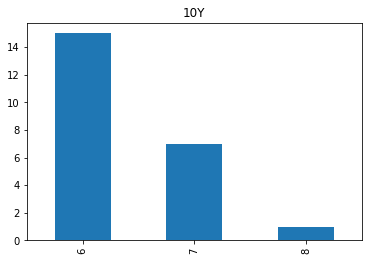

In [174]:
%matplotlib inline
df5.plot(kind='bar', title='10Y')

In [175]:
df3.to_excel('/content/sample_data/Backtesting_end.xlsx')

In [176]:
# 벤치마크 : 코스피지수

In [177]:
!pip install finance-datareader
import FinanceDataReader as fdr
# import pandas as pd
# import numpy as np
df1_krx = fdr.StockListing('KRX')
len(df1_krx)

7063

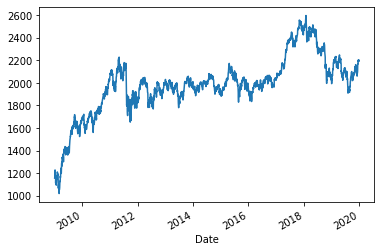

In [178]:
price_df1 = fdr.DataReader('KS11', '2009-01-01','2019-12-31') #티커 및 기간설정
price_df1['Close'].plot()

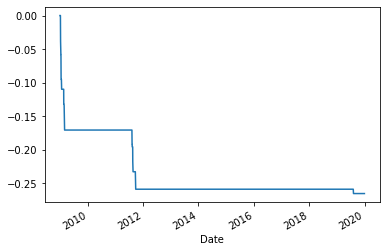

In [179]:
price_df1['daily_rtn'] = price_df1['Close'].pct_change()
#  Buy & Hold Strategy 누적 곱을 계산 한 사례  판다스 cumprod() 함수 사용
price_df1['st_rtn'] = (1+price_df1['daily_rtn']).cumprod()
## mdd  필요 자료 
historical_max = price_df1['Close'].cummax()
daily_drawdown = price_df1['Close'] / historical_max - 1.0
historical_dd = daily_drawdown.cummin()
historical_dd.plot()

In [180]:
CAGR = price_df1.loc['2019-12-30','st_rtn'] ** (252./len(price_df1.index)) -1
Sharpe = np.mean(price_df1['daily_rtn']) / np.std(price_df1['daily_rtn']) * np.sqrt(252.)
#VOL = np.std(price_df1['daily_rtn']) * np.sqrt(252.)
MDD = historical_dd.min()
print('CAGR : ',round(CAGR*100,2),'%')
print('Sharpe : ',round(Sharpe,2))
#print('VOL : ',round(VOL*100,2),'%')
print('MDD : ',round(-1*MDD*100,2),'%')

CAGR :  6.12 %
Sharpe :  0.45
MDD :  26.5 %


---
#5년
---

In [143]:
for stock in stocks :
  for k in stock.keys():
    df_2 = yf.download(stock[k], start = '2015-01-01', end='2019-12-31')
    price_df2 = df_2.loc[:,['Adj Close']].copy()
    price_df2['daily_rtn'] = price_df2['Adj Close'].pct_change() # Buy & Hold Strategy 누적 곱을 계산 한 사례  판다스 cumprod() 함수 사용
    price_df2['st_rtn'] = (1+price_df2['daily_rtn']).cumprod()
    historical_max2 = price_df2['Adj Close'].cummax()
    daily_drawdown2 = price_df2['Adj Close'] / historical_max2 - 1.0
    historical_dd2= daily_drawdown2.cummin()
    CAGR = price_df2.loc['2019-12-30','st_rtn'] ** (252./len(price_df2.index)) -1
    Sharpe = np.mean(price_df2['daily_rtn']) / np.std(price_df2['daily_rtn']) * np.sqrt(252.)
    MDD = historical_dd2.min()
    
    CAGR_1=round(CAGR*100,2)
    Sharpe_1=round(Sharpe,2)
    MDD_1=round(-1*MDD*100,2)

    data=[[k, CAGR_1, Sharpe_1, MDD_1]]
    df_m=pd.DataFrame(data,columns=myColumns)
    df6=df.append(df_m, ignore_index=True)
df6


#    print('CAGR : ',round(CAGR*100,2),'%')
#    print('Sharpe : ',round(Sharpe,2))
#    print('MDD : ',round(-1*MDD*100,2),'%')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,회사명,CAGR(%),Sharpe,MDD(%)
0,(주)한진중공업홀딩스,-12.33,-0.14,88.84
1,금호전기(주),-13.72,-0.12,96.91
2,STX중공업(주),-59.24,-0.79,99.99
3,(주)씨아이테크,1.29,0.36,95.39
4,웰바이오텍(주),-10.23,0.19,91.44
...,...,...,...,...
82,무림피앤피(주),8.81,0.41,62.81
83,동아에스티(주),-2.63,0.14,56.33
84,동일고무벨트(주),-5.98,-0.03,64.38
85,(주)이월드,33.33,0.75,84.33


In [144]:
df6

,회사명,CAGR(%),Sharpe,MDD(%)
0,(주)한진중공업홀딩스,-12.33,-0.14,88.84
1,금호전기(주),-13.72,-0.12,96.91
2,STX중공업(주),-59.24,-0.79,99.99
3,(주)씨아이테크,1.29,0.36,95.39
4,웰바이오텍(주),-10.23,0.19,91.44
...,...,...,...,...
82,무림피앤피(주),8.81,0.41,62.81
83,동아에스티(주),-2.63,0.14,56.33
84,동일고무벨트(주),-5.98,-0.03,64.38
85,(주)이월드,33.33,0.75,84.33


In [145]:
df7 = pd.merge(A, df6)

df7

,회사명,거래소코드,Z(K2) Score,F Score,시가총액,CAGR(%),Sharpe,MDD(%)
0,(주)한진중공업홀딩스,003480.KS,-37.922085,6,76482213080,-12.33,-0.14,88.84
1,금호전기(주),001210.KS,-33.796449,6,44043971400,-13.72,-0.12,96.91
2,STX중공업(주),071970.KS,-25.506715,8,85789688205,-59.24,-0.79,99.99
3,(주)씨아이테크,004920.KS,-22.017654,7,24829240728,1.29,0.36,95.39
4,웰바이오텍(주),010600.KS,-19.829073,6,93977081610,-10.23,0.19,91.44
...,...,...,...,...,...,...,...,...
82,무림피앤피(주),009580.KS,0.542649,6,263506168900,8.81,0.41,62.81
83,동아에스티(주),170900.KS,0.638220,7,1004820292000,-2.63,0.14,56.33
84,동일고무벨트(주),163560.KS,0.652069,7,73558500000,-5.98,-0.03,64.38
85,(주)이월드,084680.KS,0.743639,7,757245070620,33.33,0.75,84.33


In [146]:
df8 = df7.sort_values(by='CAGR(%)' ,ascending=False)

df8.head(10)

,회사명,거래소코드,Z(K2) Score,F Score,시가총액,CAGR(%),Sharpe,MDD(%)
85,(주)이월드,084680.KS,0.743639,7,757245070620,33.33,0.75,84.33
47,하이트진로(주),000080.KS,-2.078810,6,2066784934000,28.12,0.31,51.64
86,(주)이월드,084680.KS,0.743639,7,757245070620,27.87,0.68,59.49
78,(주)한진칼,180640.KS,0.419783,6,2388288960000,22.59,0.65,61.95
70,(주)한익스프레스,014130.KS,-0.221016,6,52920000000,20.60,0.62,73.32
63,영화금속(주),012280.KS,-0.838249,8,73857884750,17.83,0.58,64.09
52,삼일제약(주),000520.KS,-1.701507,6,136825000000,15.75,0.53,68.85
58,(주)케이에스에스해운,044450.KS,-1.383527,7,179226852400,15.54,0.65,40.32
25,(주)우진플라임,049800.KS,-3.760391,6,34600000000,15.45,0.53,79.35
55,(주)대창,012800.KS,-1.518821,6,129878260575,14.10,0.51,73.14


In [147]:
df9 = df8[df8['CAGR(%)'] >= 2.74]

df9.head(5)

,회사명,거래소코드,Z(K2) Score,F Score,시가총액,CAGR(%),Sharpe,MDD(%)
85,(주)이월드,084680.KS,0.743639,7,757245070620,33.33,0.75,84.33
47,하이트진로(주),000080.KS,-2.078810,6,2066784934000,28.12,0.31,51.64
86,(주)이월드,084680.KS,0.743639,7,757245070620,27.87,0.68,59.49
78,(주)한진칼,180640.KS,0.419783,6,2388288960000,22.59,0.65,61.95
70,(주)한익스프레스,014130.KS,-0.221016,6,52920000000,20.60,0.62,73.32


---
#3년
---


In [148]:
for stock in stocks :
  for k in stock.keys():
    df_3 = yf.download(stock[k], start = '2017-01-01', end='2019-12-31')
    price_df3 = df_3.loc[:,['Adj Close']].copy()
    price_df3['daily_rtn'] = price_df3['Adj Close'].pct_change() # Buy & Hold Strategy 누적 곱을 계산 한 사례  판다스 cumprod() 함수 사용
    price_df3['st_rtn'] = (1+price_df3['daily_rtn']).cumprod()
    historical_max3 = price_df3['Adj Close'].cummax()
    daily_drawdown3 = price_df3['Adj Close'] / historical_max3 - 1.0
    historical_dd3= daily_drawdown3.cummin()
    CAGR = price_df3.loc['2019-12-30','st_rtn'] ** (252./len(price_df3.index)) -1
    Sharpe = np.mean(price_df3['daily_rtn']) / np.std(price_df3['daily_rtn']) * np.sqrt(252.)
    MDD = historical_dd3.min()
    
    CAGR_1=round(CAGR*100,2)
    Sharpe_1=round(Sharpe,2)
    MDD_1=round(-1*MDD*100,2)

    data=[[k, CAGR_1, Sharpe_1, MDD_1]]
    df_m=pd.DataFrame(data,columns=myColumns)
    df10=df.append(df_m, ignore_index=True)
df10


#    print('CAGR : ',round(CAGR*100,2),'%')
#    print('Sharpe : ',round(Sharpe,2))
#    print('MDD : ',round(-1*MDD*100,2),'%')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,회사명,CAGR(%),Sharpe,MDD(%)
0,(주)한진중공업홀딩스,-12.33,-0.14,88.84
1,금호전기(주),-13.72,-0.12,96.91
2,STX중공업(주),-59.24,-0.79,99.99
3,(주)씨아이테크,1.29,0.36,95.39
4,웰바이오텍(주),-10.23,0.19,91.44
...,...,...,...,...
82,무림피앤피(주),8.81,0.41,62.81
83,동아에스티(주),-2.63,0.14,56.33
84,동일고무벨트(주),-5.98,-0.03,64.38
85,(주)이월드,33.33,0.75,84.33


In [149]:
df10

,회사명,CAGR(%),Sharpe,MDD(%)
0,(주)한진중공업홀딩스,-12.33,-0.14,88.84
1,금호전기(주),-13.72,-0.12,96.91
2,STX중공업(주),-59.24,-0.79,99.99
3,(주)씨아이테크,1.29,0.36,95.39
4,웰바이오텍(주),-10.23,0.19,91.44
...,...,...,...,...
82,무림피앤피(주),8.81,0.41,62.81
83,동아에스티(주),-2.63,0.14,56.33
84,동일고무벨트(주),-5.98,-0.03,64.38
85,(주)이월드,33.33,0.75,84.33


In [150]:
df11 = pd.merge(A, df10)

df11

,회사명,거래소코드,Z(K2) Score,F Score,시가총액,CAGR(%),Sharpe,MDD(%)
0,(주)한진중공업홀딩스,003480.KS,-37.922085,6,76482213080,-12.33,-0.14,88.84
1,금호전기(주),001210.KS,-33.796449,6,44043971400,-13.72,-0.12,96.91
2,STX중공업(주),071970.KS,-25.506715,8,85789688205,-59.24,-0.79,99.99
3,(주)씨아이테크,004920.KS,-22.017654,7,24829240728,1.29,0.36,95.39
4,웰바이오텍(주),010600.KS,-19.829073,6,93977081610,-10.23,0.19,91.44
...,...,...,...,...,...,...,...,...
82,무림피앤피(주),009580.KS,0.542649,6,263506168900,8.81,0.41,62.81
83,동아에스티(주),170900.KS,0.638220,7,1004820292000,-2.63,0.14,56.33
84,동일고무벨트(주),163560.KS,0.652069,7,73558500000,-5.98,-0.03,64.38
85,(주)이월드,084680.KS,0.743639,7,757245070620,33.33,0.75,84.33


In [151]:
df12 = df11.sort_values(by='CAGR(%)' ,ascending=False)

df12.head(10)

,회사명,거래소코드,Z(K2) Score,F Score,시가총액,CAGR(%),Sharpe,MDD(%)
85,(주)이월드,084680.KS,0.743639,7,757245070620,33.33,0.75,84.33
86,(주)이월드,084680.KS,0.743639,7,757245070620,29.90,0.72,36.80
47,하이트진로(주),000080.KS,-2.078810,6,2066784934000,28.12,0.31,51.64
78,(주)한진칼,180640.KS,0.419783,6,2388288960000,22.59,0.65,61.95
70,(주)한익스프레스,014130.KS,-0.221016,6,52920000000,20.60,0.62,73.32
63,영화금속(주),012280.KS,-0.838249,8,73857884750,17.83,0.58,64.09
52,삼일제약(주),000520.KS,-1.701507,6,136825000000,15.75,0.53,68.85
58,(주)케이에스에스해운,044450.KS,-1.383527,7,179226852400,15.54,0.65,40.32
25,(주)우진플라임,049800.KS,-3.760391,6,34600000000,15.45,0.53,79.35
55,(주)대창,012800.KS,-1.518821,6,129878260575,14.10,0.51,73.14


In [152]:
df13 = df12[df12['CAGR(%)'] >=  2.83]

df13.head(5)

,회사명,거래소코드,Z(K2) Score,F Score,시가총액,CAGR(%),Sharpe,MDD(%)
85,(주)이월드,084680.KS,0.743639,7,757245070620,33.33,0.75,84.33
86,(주)이월드,084680.KS,0.743639,7,757245070620,29.90,0.72,36.80
47,하이트진로(주),000080.KS,-2.078810,6,2066784934000,28.12,0.31,51.64
78,(주)한진칼,180640.KS,0.419783,6,2388288960000,22.59,0.65,61.95
70,(주)한익스프레스,014130.KS,-0.221016,6,52920000000,20.60,0.62,73.32


---
#1년
---

In [154]:
for stock in stocks :
  for k in stock.keys():
    df_4 = yf.download(stock[k], start = '2019-01-01', end='2019-12-31')
    price_df4 = df_4.loc[:,['Adj Close']].copy()
    price_df4['daily_rtn'] = price_df4['Adj Close'].pct_change() # Buy & Hold Strategy 누적 곱을 계산 한 사례  판다스 cumprod() 함수 사용
    price_df4['st_rtn'] = (1+price_df4['daily_rtn']).cumprod()
    historical_max4 = price_df4['Adj Close'].cummax()
    daily_drawdown4 = price_df4['Adj Close'] / historical_max4 - 1.0
    historical_dd4= daily_drawdown4.cummin()
    CAGR = price_df4.loc['2019-12-30','st_rtn'] ** (252./len(price_df4.index)) -1
    Sharpe = np.mean(price_df4['daily_rtn']) / np.std(price_df4['daily_rtn']) * np.sqrt(252.)
    MDD = historical_dd4.min()
    
    CAGR_1=round(CAGR*100,2)
    Sharpe_1=round(Sharpe,2)
    MDD_1=round(-1*MDD*100,2)

    data=[[k, CAGR_1, Sharpe_1, MDD_1]]
    df_m=pd.DataFrame(data,columns=myColumns)
    df14=df.append(df_m, ignore_index=True)
df14


#    print('CAGR : ',round(CAGR*100,2),'%')
#    print('Sharpe : ',round(Sharpe,2))
#    print('MDD : ',round(-1*MDD*100,2),'%')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,회사명,CAGR(%),Sharpe,MDD(%)
0,(주)한진중공업홀딩스,-12.33,-0.14,88.84
1,금호전기(주),-13.72,-0.12,96.91
2,STX중공업(주),-59.24,-0.79,99.99
3,(주)씨아이테크,1.29,0.36,95.39
4,웰바이오텍(주),-10.23,0.19,91.44
...,...,...,...,...
82,무림피앤피(주),8.81,0.41,62.81
83,동아에스티(주),-2.63,0.14,56.33
84,동일고무벨트(주),-5.98,-0.03,64.38
85,(주)이월드,33.33,0.75,84.33


In [126]:
df15 = pd.merge(A, df14)

df15

,회사명,거래소코드,Z(K2) Score,F Score,시가총액,CAGR(%),Sharpe,MDD(%)
0,(주)한진중공업홀딩스,003480.KS,-37.922085,6,76482213080,-12.33,-0.14,88.84
1,금호전기(주),001210.KS,-33.796449,6,44043971400,-13.72,-0.12,96.91
2,STX중공업(주),071970.KS,-25.506715,8,85789688205,-59.24,-0.79,99.99
3,(주)씨아이테크,004920.KS,-22.017654,7,24829240728,1.29,0.36,95.39
4,웰바이오텍(주),010600.KS,-19.829073,6,93977081610,-10.23,0.19,91.44
...,...,...,...,...,...,...,...,...
82,무림피앤피(주),009580.KS,0.542649,6,263506168900,8.81,0.41,62.81
83,동아에스티(주),170900.KS,0.638220,7,1004820292000,-2.63,0.14,56.33
84,동일고무벨트(주),163560.KS,0.652069,7,73558500000,-5.98,-0.03,64.38
85,(주)이월드,084680.KS,0.743639,7,757245070620,33.33,0.75,84.33


In [127]:
df16 = df15.sort_values(by='CAGR(%)' ,ascending=False)

df16.head(10)

,회사명,거래소코드,Z(K2) Score,F Score,시가총액,CAGR(%),Sharpe,MDD(%)
86,(주)이월드,084680.KS,0.743639,7,757245070620,117.59,1.38,28.48
85,(주)이월드,084680.KS,0.743639,7,757245070620,33.33,0.75,84.33
47,하이트진로(주),000080.KS,-2.078810,6,2066784934000,28.12,0.31,51.64
78,(주)한진칼,180640.KS,0.419783,6,2388288960000,22.59,0.65,61.95
70,(주)한익스프레스,014130.KS,-0.221016,6,52920000000,20.60,0.62,73.32
63,영화금속(주),012280.KS,-0.838249,8,73857884750,17.83,0.58,64.09
52,삼일제약(주),000520.KS,-1.701507,6,136825000000,15.75,0.53,68.85
58,(주)케이에스에스해운,044450.KS,-1.383527,7,179226852400,15.54,0.65,40.32
25,(주)우진플라임,049800.KS,-3.760391,6,34600000000,15.45,0.53,79.35
55,(주)대창,012800.KS,-1.518821,6,129878260575,14.10,0.51,73.14


In [128]:
df17 = df16[df16['CAGR(%)'] >= 9.58]

df17.head(5)

,회사명,거래소코드,Z(K2) Score,F Score,시가총액,CAGR(%),Sharpe,MDD(%)
86,(주)이월드,084680.KS,0.743639,7,757245070620,117.59,1.38,28.48
85,(주)이월드,084680.KS,0.743639,7,757245070620,33.33,0.75,84.33
47,하이트진로(주),000080.KS,-2.078810,6,2066784934000,28.12,0.31,51.64
78,(주)한진칼,180640.KS,0.419783,6,2388288960000,22.59,0.65,61.95
70,(주)한익스프레스,014130.KS,-0.221016,6,52920000000,20.60,0.62,73.32


#출력결과 저장(CSV)
-벡테스팅 결과 출력후 액셀(csv파일,xsxl파일 등) 으로 저장

사용하려는 Dataframe: df_4(Buy&Hold 10년 벤치마크 이상 회사목록)

저장하려는 항목:df_4['회사명','거래소코드','Z(K2) Score','F Score','시가총액'	,'CAGR(%)',	'Sharpe',	'MDD(%)']

저장하려는 sheet명: B&H 2009-01-01~2019-12-3

이리 10/5/3/1년 분을 모두 저장.


In [129]:
# import openpyxl

In [130]:
# wb = openpyxl.Workbook()

In [131]:
# sheet1 = wb.active


In [132]:
# sheet1.title = "B&H 2009-01-01~2019-12-31"

In [133]:
# sheet2 = wb.create_sheet("B&H 2009-01-01~2019-12-31")

In [134]:
# for i in range(1, 10):
#     sheet1.cell(row=i, column=1).value = i
#     sheet2.cell(row=1, column=i).value = i

In [135]:
# wb.save('Backtesting(B&H).xlsx')

In [136]:
# df_4.to_csv("/content/data/Backtesting(B&H).csv", mode='w', index=False, encoding='utf-8-sig')

In [137]:
xlsx_dir = '/content/BnH_comp_list.xlsx'
with pd.ExcelWriter(xlsx_dir) as writer:
    df4.to_excel(writer, sheet_name = 'sheet1', index=False, encoding='utf-8-sig')
    df9.to_excel(writer, sheet_name = 'sheet2', index=False, encoding='utf-8-sig') 
    df13.to_excel(writer, sheet_name = 'sheet3', index=False, encoding='utf-8-sig') 
    df17.to_excel(writer, sheet_name = 'sheet4', index=False, encoding='utf-8-sig') 